A. Set up
1. Import packages [<span style="color:red;">Done</span>]
2. Import Data [<span style="color:red;">Done</span>]

B. Preliminary and basic data plotting
1. Import the data [<span style="color:red;">Done</span>]
2. Plot the R/G (x) vs the cal temp (y) [<span style="color:red;">Done</span>]
3. Do a least squares fit [<span style="color:red;">Done</span>]
4. Using that fit back out what the R/G should be for each cal temp [<span style="color:red;">Done</span>]
5. Cycle through the data and pull out the min and max predicted temp for each cal temp value [<span style="color:red;">Done</span>]
6. Plot the "should be R/G" vs cal temp with error bars (min max predicted temp values) [<span style="color:red;">Done</span>]{kind of}

C. Estimate the uncertainty
1. Do a fit only the min and max predicted temperature [<span style="color:red;">Done</span>]
2. Bootstrap resampling [<span style="color:red;">Done</span>]

D. General Theroy
1. Plot what the G/B relationship should look like


In [2]:
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import math

from scipy.optimize import fsolve
from scipy.optimize import bisect

import tkinter as tk
from tkinter import filedialog


In [3]:
#####################################################################
#IMPORT THE FULL CALIBRATION DATASET FOR THE FUJIFILM CAMERA W/UNCERTAINTY - PART 1 - FULL DATA SET
#####################################################################

#ASK THE USER TO SELECT THE FILE TO BE PROCESS THROUGH A FILE DIALOG
root = tk.Tk()
root.attributes('-topmost', 1) #FORCE FILEDIALOG TO OPEN ON TOP
root.withdraw()

data_file_path1 = filedialog.askopenfilename(parent=root)

# Read data from CSV file
full_data = pd.read_csv(data_file_path1)



In [4]:
#####################################################################
#PLOTTING THE REDUCED CALIBRATION DATA FOR THE FUJIFILM CAMERA - REDUCED DATASET
#####################################################################


#ASK THE USER TO SELECT THE FILE TO BE PROCESS THROUGH A FILE DIALOG
root = tk.Tk()
root.attributes('-topmost', 1) #FORCE FILEDIALOG TO OPEN ON TOP
root.withdraw()

data_file_path2 = filedialog.askopenfilename(parent=root)

# Read data from CSV file
reduced_data = pd.read_csv(data_file_path2)

In [5]:
#####################################################################
# EXCEL FIT COEFFICENTS MANUALLY ENTERED FOR USE LATER
#####################################################################

# Last Checked for Changes --> 6/11/2023

#FUJIFILM CAMERA FIT COEFFICIENTS
f_ax = -159.96
f_bx = 1752.3
f_cx = -7730
f_dx = 17398
f_ex = -20761
f_fx = 12292

In [6]:
### Data reminder note

# The REDUCED DATA consists of the electrically predicted temperature of:
### --> The electrically predicted temperature -- Considered to the be absolute reference as far as we are concerned here (the "true" temperature)
### --> The the "backed out" or "true" R/G that should give the temperature if passed through the excel Fit curve

In [4]:
full_data

,Ref Temp [C],Ref Temp [K],R/G,G/B,Ravg,Gavg,Bavg,Pred Temp [K]
0,747.183907,1020.333907,2.878346,5.427958,7644.6,2655.9,489.3,1013.184155
1,747.183907,1020.333907,2.874716,5.481050,8106.7,2820.0,514.5,1014.933732
2,747.183907,1020.333907,2.859260,5.599628,8605.8,3009.8,537.5,1022.273539
3,747.183907,1020.333907,2.739488,5.513480,8515.7,3108.5,563.8,1074.741107
4,747.183907,1020.333907,2.818513,5.556041,7880.0,2795.8,503.2,1040.874187
...,...,...,...,...,...,...,...,...
295,2810.109050,3083.259050,0.923988,3.195957,7040.6,7619.8,2384.2,3034.333465
296,2810.109050,3083.259050,0.918667,3.166163,6349.0,6911.1,2182.8,3052.858441
297,2810.109050,3083.259050,0.910412,3.166388,7572.9,8318.1,2627.0,3082.019115
298,2810.109050,3083.259050,0.910104,3.219636,7351.0,8077.1,2508.7,3083.118372


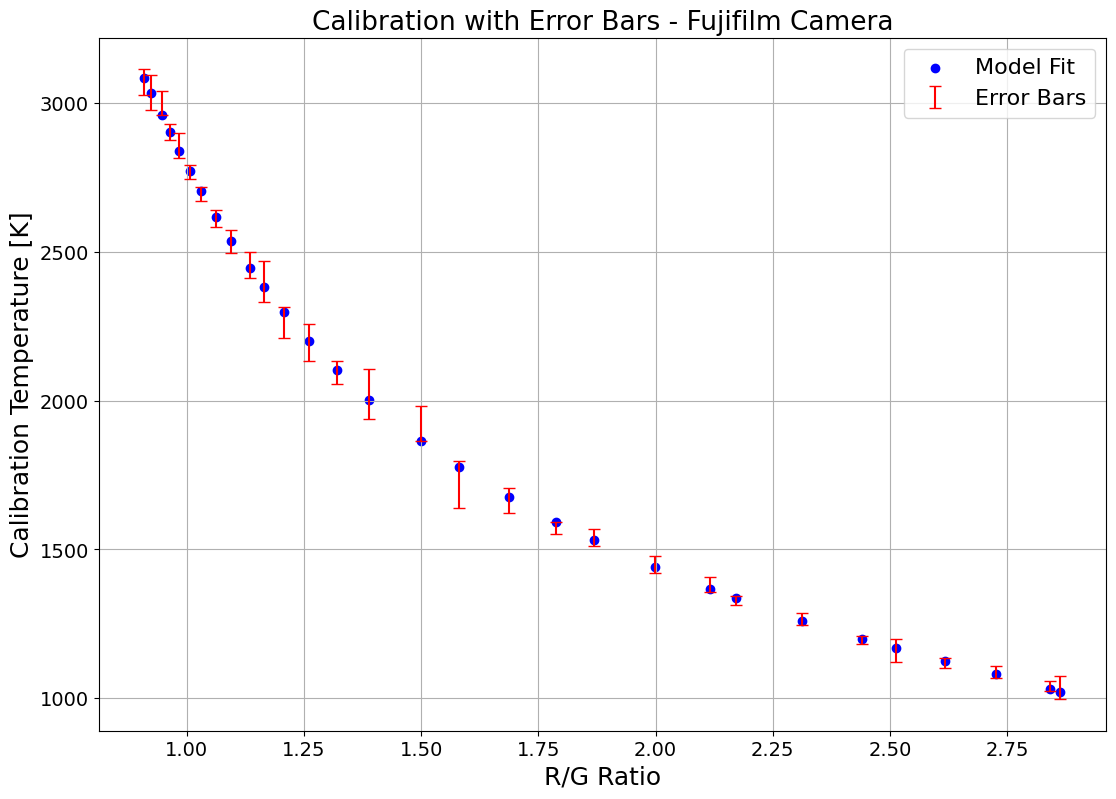

In [6]:
#####################################################################
#PLOTTING THE CALIBRATION DATA USING THE (MANUALLY) "REDUCED" DATA
####################################################################

'''
This section takes the "REDUCED" data that was imported at the top of the file and plots the fit curve relationship along with error bars at each of the
known (or electrically determined) temperature values.

1. The blue dots are where the known temperature intersect the excel fit curve.
2. The upper and lower error bounds are the minimum and maximum temperatures predicted by the measured R/G value using the Excel fit curve

'''

x = reduced_data['Cal_RG']
y = reduced_data['Cal_Temp']
lower_bounds = (reduced_data['Cal_Temp']-reduced_data['Min_Temp'])
upper_bounds = reduced_data['Max_Temp'] - reduced_data['Cal_Temp']

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

# Plotting
plt.scatter(x, y, color='blue',label='Model Fit')
plt.errorbar(x, y, yerr=[lower_bounds, upper_bounds], fmt='none', capsize=4, color='red', label='Error Bars')
plt.xlabel('R/G Ratio', fontsize=18)
plt.ylabel('Calibration Temperature [K]', fontsize=18)
plt.title('Calibration with Error Bars - Fujifilm Camera', fontsize=19)
plt.legend(fontsize=16)
plt.grid(True)

#  Set font sizes for tick labels on both axes
plt.xticks(fontsize=14)  # Increase fontsize for x-axis tick labels
plt.yticks(fontsize=14)  # Increase fontsize for y-axis tick labels

plt.show()

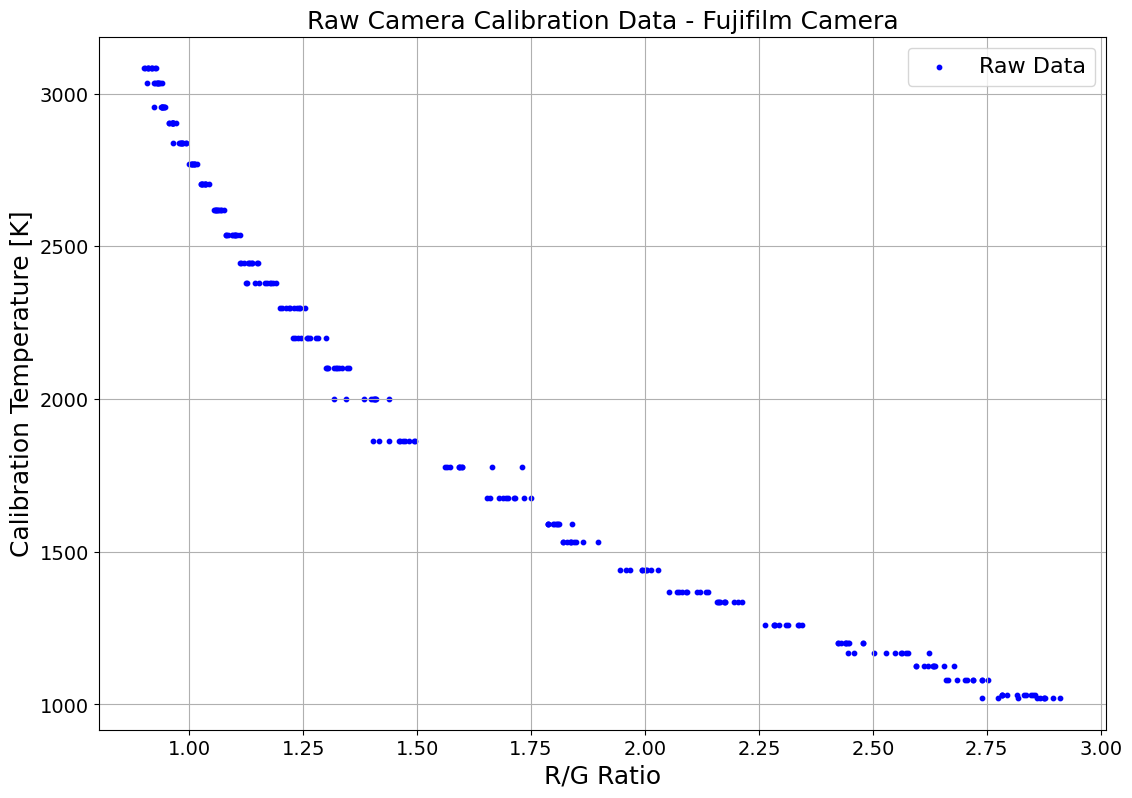

In [7]:
#####################################################################
#PLOTTING THE FULL RAW CAMERA CALIBRATION DATASET [R/G RATIO]
####################################################################

rg = full_data['R/G'].values
y = full_data['Ref Temp [K]'].values

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

# Plotting
plt.scatter(rg, y, color='blue',s=10,label='Raw Data')
plt.xlabel('R/G Ratio', fontsize=18)
plt.ylabel('Calibration Temperature [K]', fontsize=18)
plt.title('Raw Camera Calibration Data - Fujifilm Camera', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

#  Set font sizes for tick labels on both axes
plt.xticks(fontsize=14)  # Increase fontsize for x-axis tick labels
plt.yticks(fontsize=14)  # Increase fontsize for y-axis tick labels

plt.show()

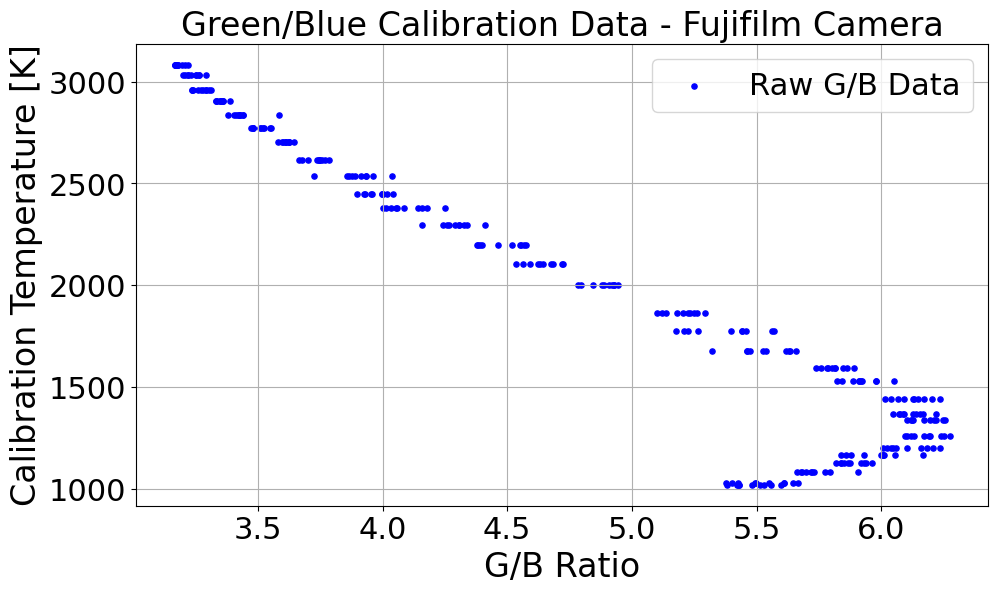

In [10]:
#####################################################################
#PLOTTING THE FULL RAW CAMERA CALIBRATION DATASET [G/B RATIO]
####################################################################

'''
It should be noted here that I opted to go with the G/B ratio because it follows the established pattern as the R/G ratio of decreasing value with increasing temperature - i.e. consistency
'''

gb = full_data['G/B'].values
y = full_data['Ref Temp [K]'].values

plt.figure(figsize=(11, 6))  # Adjust the dimensions as desired

# Plotting
plt.scatter(gb, y, color='blue',s=14,label='Raw G/B Data')
plt.xlabel('G/B Ratio', fontsize=24)
plt.ylabel('Calibration Temperature [K]', fontsize=24)
plt.title('Green/Blue Calibration Data - Fujifilm Camera', fontsize=24)
plt.legend(fontsize=22)
plt.grid(True)

#  Set font sizes for tick labels on both axes
plt.xticks(fontsize=22)  # Increase fontsize for x-axis tick labels
plt.yticks(fontsize=22)  # Increase fontsize for y-axis tick labels

plt.show()

In [11]:
#####################################################################
#USING PYTHON INSTEAD OF EXCEL TO CALCULATE THE FIFTH ORDER POLYNOMIAL FIT
#####################################################################

# Perform least squares fit and return rg_coefficients
rg_coefficients = np.polyfit(rg, y, 5)
gb_coefficients = np.polyfit(gb, y, 5)
# excel_coefficients = [f_ax, f_bx, f_cx, f_dx, f_ex, f_fx]

rg_polynomial_fit = np.poly1d(rg_coefficients)
gb_polynomial_fit = np.poly1d(gb_coefficients)

print('*********************')
print('Python R/G Fit Equation')
print('*********************')
print(rg_polynomial_fit)

print('\n\n\n')

print('*********************')
print('Python G/B Fit Equation')
print('*********************')
print(gb_polynomial_fit)

'''
The following commented out code was originally added to verify that excel was generating the same
fit coefficients as polyfit. Once that was successfully verified, it because redundant.
'''

# print('*********************')
# print('Excel R/G Fit Equation')
# print('*********************')

# excel_RGpoly_fit = np.poly1d(excel_coefficients)

# print(excel_RGpoly_fit)


*********************
Python R/G Fit Equation
*********************
      5        4        3            2
-160 x + 1752 x - 7730 x + 1.74e+04 x - 2.076e+04 x + 1.229e+04




*********************
Python G/B Fit Equation
*********************
        5         4        3             2
-11.75 x + 396.9 x - 4768 x + 2.661e+04 x - 7.109e+04 x + 7.662e+04


'\nThe following commented out code was originally added to verify that excel was generating the same\nfit coefficients as polyfit. Once that was successfully verified, it because redundant.\n'

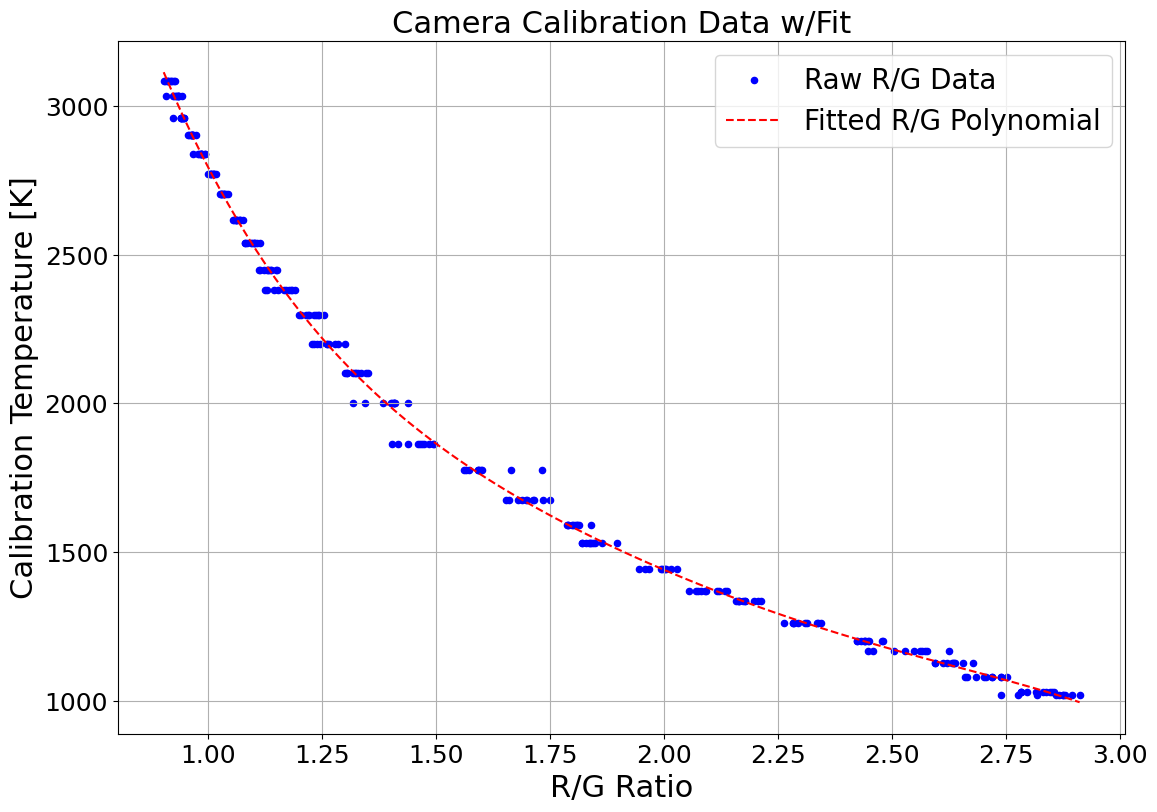

In [12]:
#####################################################################
#PLOTTING BOTH THE RAW DATA AND THE FIT EQUATION --> [R/G Ratio]
#####################################################################

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

# Plotting
plt.scatter(rg, y, color='blue',s=20,label='Raw R/G Data')

rg_fit = np.linspace(rg.min(), rg.max(), 100)
plt.plot(rg_fit, rg_polynomial_fit(rg_fit), '--', color='red', label='Fitted R/G Polynomial')

plt.xlabel('R/G Ratio', fontsize=22)
plt.ylabel('Calibration Temperature [K]', fontsize=22)
plt.title('Camera Calibration Data w/Fit', fontsize=22)
plt.legend(fontsize=20)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

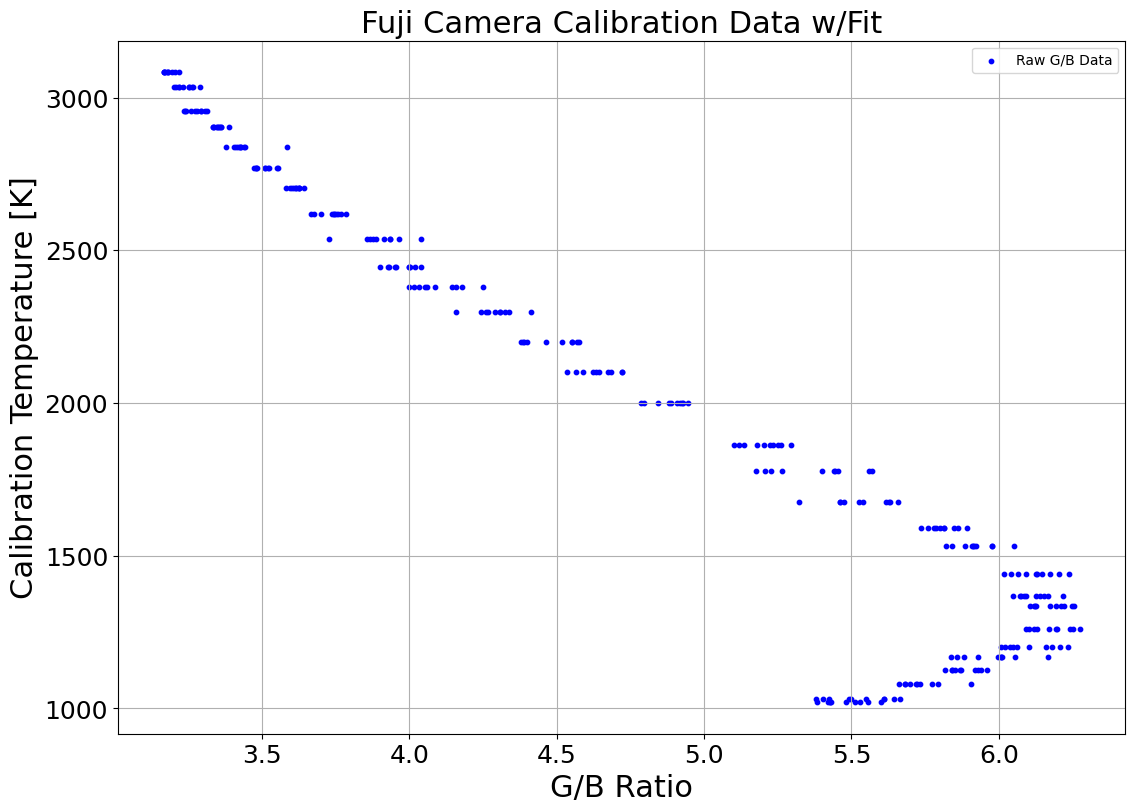

In [14]:
#####################################################################
#PLOTTING BOTH THE RAW DATA AND THE FIT EQUATION --> [G/B Ratio]
#####################################################################

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

# Plotting
plt.scatter(gb, y, color='blue',s=10,label='Raw G/B Data')

gb_fit = np.linspace(gb.min(), gb.max(), 100)
# plt.plot(gb_fit, gb_polynomial_fit(gb_fit), '--', color='red', label='Fitted G/B Polynomial')

plt.xlabel('G/B Ratio', fontsize=22)
plt.ylabel('Calibration Temperature [K]', fontsize=22)
plt.title('Fuji Camera Calibration Data w/Fit', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

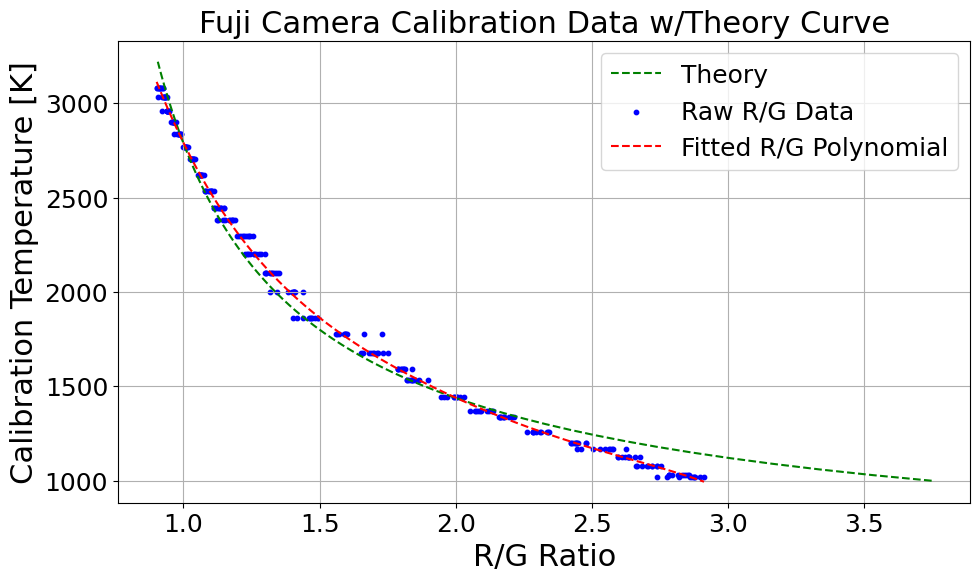

In [42]:
#####################################################################
#PLOTTING THE IDEALIZED PEDICTED CURVE FROM PLANCK'S LAW W/RAW UNCERTAINTY DATA
#####################################################################

#DEFINE PHYSICAL CONSTANTS
Kb= 1.3806504E-23 #Boltzman constant in J/K
h = 6.62606896E-34 #Planck's constant in J*s
C0 = 2.9979E8 #Speed of light in vacuum in meters per second

#DEFINE CONSTRUCTED CONSTANTS
C1 = h*(C0**2)
C2 = h*(C0/Kb)

#DEFINE TEMPERATURE VALUE ARRAY
T_ser = range(1000, 3250, 30) #Temperature value domain from 1000K to 2800 K with 30 samples
Temp = list(T_ser)

#DEFINE SINGLE WAVELENGTH VALUES FOR R,G,B [taken from paper that analyzed color bandwiths in nanometers]
lam_R = 597E-9
lam_G = 550E-9
lam_B = 485E-9

pi = math.pi

#CREATE EMPTY INTENSITY LIST
IntR = []
IntG = []
IntB = []

#ITERATE THROUGH TEMPERATURE VALUES TO GENERATE INTENSITY FOR EACH COLOR

for i in Temp: #ITERATE THROUGH AND CALUCLUATE THE INTENSITY AT ALL TEMPERATURES FOR THE SELECTED RED WAVELENGTH

    denom = ((lam_R)**5)*((math.exp((h*C0)/(Kb*(lam_R)*i)))-1)
    numer = (2*pi*h*(C0**2))

    spec = numer/denom

    IntR.append(spec)


for j in Temp:  #ITERATE THROUGH AND CALCULATE THE INTENSITY AT ALL TEMPERATURES FOR THE SELECTED GREEN WAVELENGTH

    denom = ((lam_G)**5)*((math.exp((h*C0)/(Kb*(lam_G)*j)))-1)
    numer = (2*pi*h*(C0**2))

    spec = numer/denom

    IntG.append(spec)

for k in Temp:  #ITERATE THROUGH AND CALCULATE THE INTENSITY AT ALL TEMPERATURES FOR THE SELECTED BLUE WAVELENGTH 

    denom = (lam_B**5)*((math.exp((h*C0)/(Kb*lam_B*k)))-1)
    numer = (2*pi*h*(C0**2))

    spec = numer/denom

    IntB.append(spec)


#DEFINE EMPTY RATIO LISTS
RG = []
RB = []
GB = []

#GENERATE THE RATIO LISTS
for a in range(len(IntR)):              #R/G Ratio

    RGrat = IntR[a]/IntG[a]
    RBrat = IntR[a]/IntB[a]
    BGrat = IntG[a]/IntB[a]

    RG.append(RGrat)
    RB.append(RBrat)
    GB.append(BGrat)

#numpy conversions
Temperature = np.array(Temp)

Red_int = np.array(IntR)
Blue_int = np.array(IntB)
Green_int = np.array(IntG)

RG_Ratio = np.array(RG)
GB_Ratio = np.array(GB)
RB_Ratio = np.array(RB)

RG_Ratio_mod = RG_Ratio*(0.72)  # Create Modified ratio
RB_Ratio_mod = RB_Ratio*(1.2)   # Create modified R/B ratio to account for proportionally --> Go back 
                                # and verify if the 0.7 was only against green or also blue (using for now)

plt.figure(figsize=(11, 6))  # Adjust the dimensions as desired

plt.plot(RG_Ratio_mod, Temperature, 'g--', label='Theory')
plt.scatter(rg, y, color='blue',s=10,label='Raw R/G Data')
plt.plot(rg_fit, rg_polynomial_fit(rg_fit), '--', color='red', label='Fitted R/G Polynomial')
plt.xlabel('R/G Ratio', fontsize=22)
plt.ylabel('Calibration Temperature [K]', fontsize=22)
plt.title('Fuji Camera Calibration Data w/Theory Curve', fontsize=22)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

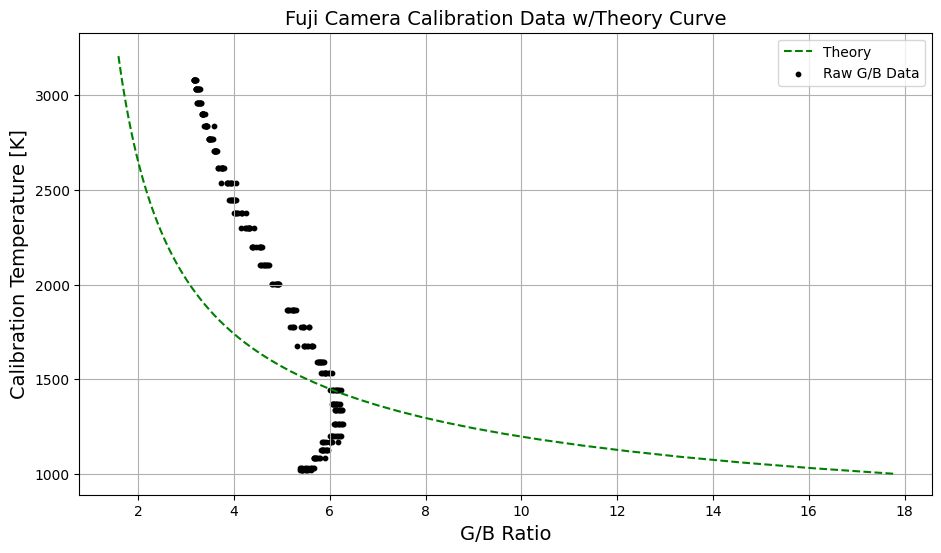

In [41]:
###########################################################################
# PLOTTING WHAT THE THEORY OF PLANCK'S LAW SAYS THE CURVE OF G/B SHOULD BE
###########################################################################

plt.figure(figsize=(11, 6))  # Adjust the dimensions as desired

plt.plot(GB_Ratio, Temperature, 'g--', label='Theory')
plt.scatter(gb, y, color='black',s=10,label='Raw G/B Data')
# plt.plot(gb_fit, gb_polynomial_fit(gb_fit), '--', color='blue', label='Fitted G/B Polynomial')  This fit is currently a mess, so I'm leaving it commented out.
plt.xlabel('G/B Ratio', fontsize=14)
plt.ylabel('Calibration Temperature [K]', fontsize=14)
plt.title('Fuji Camera Calibration Data w/Theory Curve', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
########
# NOTE
########

'''
On the face of it, the plot of the measured G/B ratio vs what the theoretically derived equations says it should be is very
bad looking. Indeed, it raises some serious questions about the overall accuracy of the method. At the very least, it says that
there are unknown factors at play here.


Next Steps:

    1.  Finish the individual color intensity calibration and compare individual color channels to try and identify where the issue
        is comming from --> the blue channel or the green channel?
    
    2. Go back and look at the filter analysis plot from the pyrometry paper that I found.
            --> What there any scaling that needs to be applied on either blue or green like I used for red?
            --> Look at how much overlap there is between blue/green vs red/green
    
            
Theories:

    1.  The level of overlap between the green and blue spectral regions is greater, leading to weird behavior?

    2.  The (tungsten?) filament is not truly a gray body and emmissivity changes for higher frequencies?

    3.  There is some level of preferrential absorption of blue? frequencies happenign somewhere?

'''

'\nOn the face of it, the plot of the measured G/B ratio vs what the theoretically derived equations says it should be is very\nbad looking. Indeed, it raises some serious questions about the overall accuracy of the method. At the very least, it says that\nthere are unknown factors at play here.\n\n\nNext Steps:\n\n    1.  Finish the individual color intensity calibration and compare individual color channels to try and identify where the issue\n        is comming from --> the blue channel or the green channel?\n    \n    2. Go back and look at the filter analysis plot from the pyrometry paper that I found.\n            --> What there any scaling that needs to be applied on either blue or green like I used for red?\n            --> Look at how much overlap there is between blue/green vs red/green\n    \n            \nTheories:\n\n    1.  The level of overlap between the green and blue spectral regions is greater, leading to weird behavior?\n\n    2.  The (tungsten?) filament is not tru

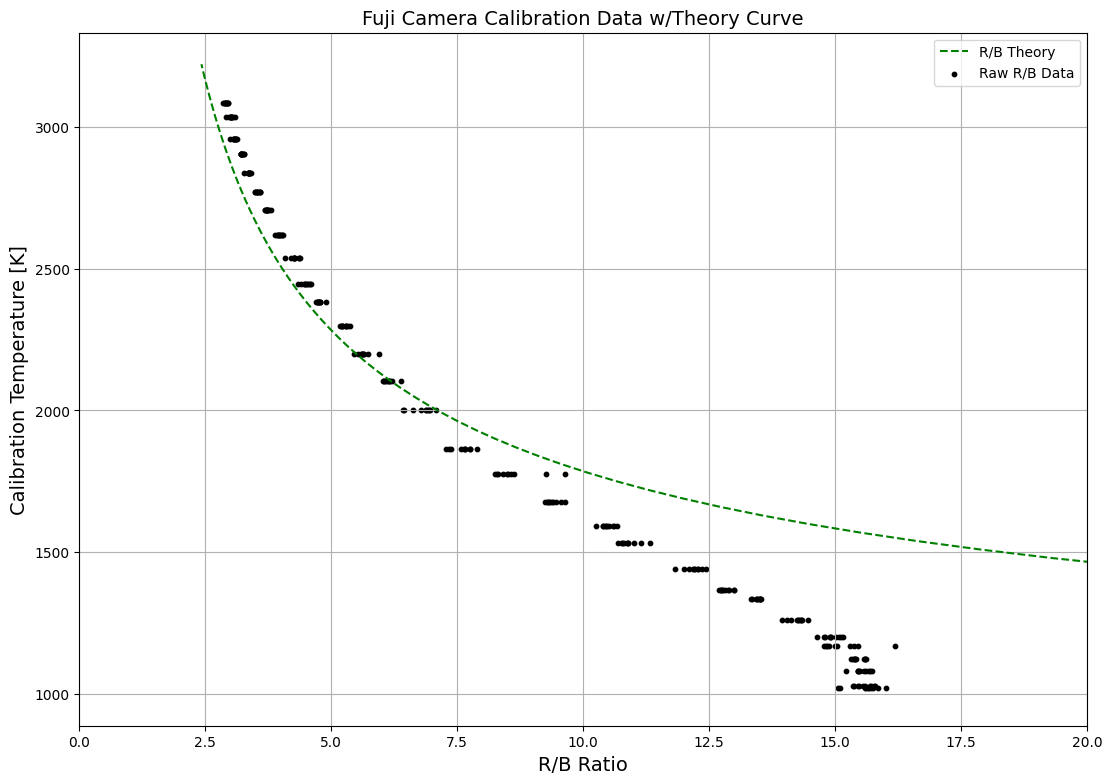

In [13]:
###########################################################################
# PLOTTING WHAT THE THEORY OF PLANCK'S LAW SAYS THE CURVE OF R/B SHOULD BE
###########################################################################

'''
When post-processing the data in Excel, I didn't compute the R/B ratio ahead of time (see full_data), some I'm going to have to
do it real quick here in Python.
'''

Ravg = full_data['Ravg']
Bavg = full_data['Bavg']

rb = Ravg/Bavg

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

plt.plot(RB_Ratio_mod, Temperature, 'g--', label='R/B Theory')
plt.scatter(rb, y, color='black',s=10,label='Raw R/B Data')
# plt.plot(gb_fit, gb_polynomial_fit(gb_fit), '--', color='blue', label='Fitted G/B Polynomial')  This fit is currently a mess, so I'm leaving it commented out.
plt.xlabel('R/B Ratio', fontsize=14)
plt.ylabel('Calibration Temperature [K]', fontsize=14)
plt.title('Fuji Camera Calibration Data w/Theory Curve', fontsize=14)
plt.xlim(0,20)
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#######
# NOTES
########

'''
After looking at the plot for the R/B ratio, it is very clear that the problem lies in the blue channel signal. I am inclined to believe
that it is simply a matter of the blue signal being too small at lower temperatures to be a reliable predictor. The dynamic range of the 
camera is simple too small to capture both the very high intensity red signal and the much lower blue signal.

One way to rectify this would be to do a supplemental blue/green calibration series for lower temperatures only where you allow the red
signal to saturate and instead set the exposure using the green signal. The ratio the Green/Blue using that data and see if it agrees.
'''

'\nAfter looking at the plot for the R/B ratio, it is very clear that the problem lies in the blue channel signal. I am inclined to believe\nthat it is simply a matter of the blue signal being too small at lower temperatures to be a reliable predictor. The dynamic range of the \ncamera is simple too small to capture both the very high intensity red signal and the much lower blue signal.\n\nOne way to rectify this would be to do a supplemental blue/green calibration series for lower temperatures only where you allow the red\nsignal to saturate and instead set the exposure using the green signal. The ratio the Green/Blue using that data and see if it agrees.\n'

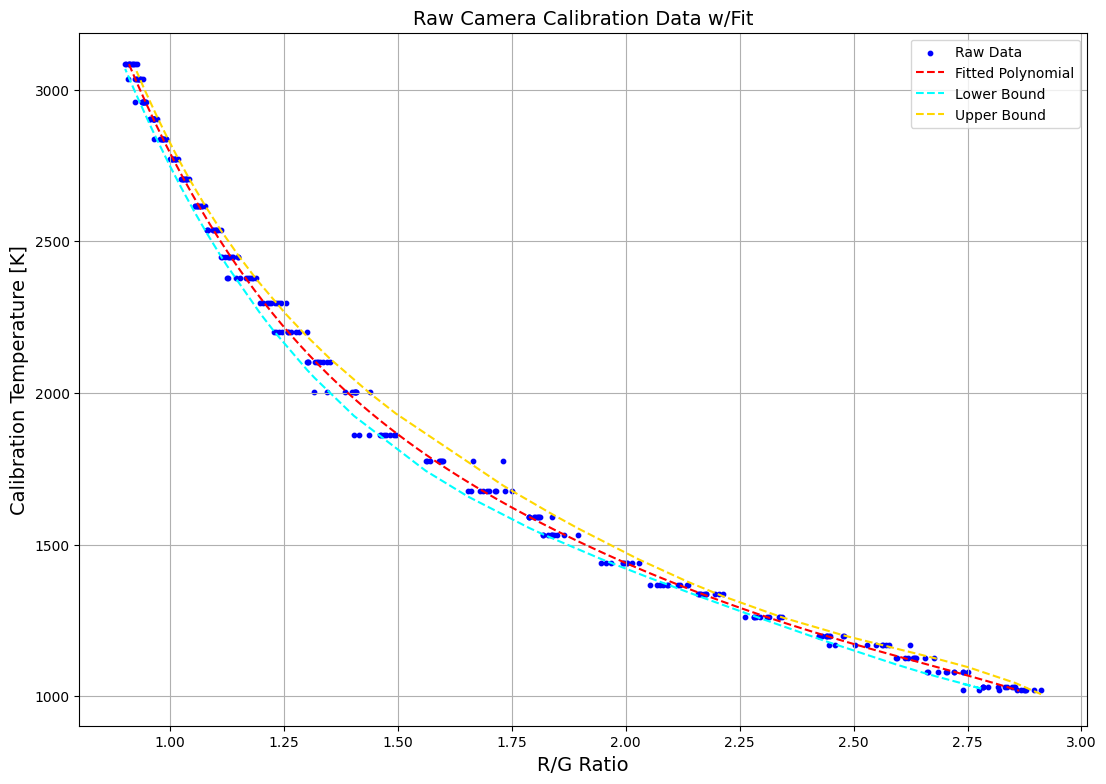

In [14]:
#####################################################################
#FITTING ONLY TO THE MAXIMUM AND MINIMUM R/G VALUES
#####################################################################

'''
One potential approach is to isolate the maximum R/G ratio measured at each calibration temperature and then
fit only to that data series. Then do it for the minimum R/G values at each calibration temperature. Using polyfit,
two equations for the upper limit and the lower limit can be generated. 

To determine the "vertical" or temperature error bars for a given R/G value, I would plug the R/G value of interested
into all three polynomials. The global fit to predict the "true" temperature and then the upper and lower limit
polynomials to get the error bar values.
'''
####
#Isolate the maximum R/G value at each of the calibration temperatures
####

#Find the list of unique y (temperature) values
unique_y = full_data['Ref Temp [K]'].unique()

max_RG = []
min_RG = []

#Find the minimum and maximum R/G value for each unique y (tmperature) value

# Iterate over unique x values
for i in unique_y:
    # Filter the DataFrame for each x value
    filtered_df = full_data[full_data['Ref Temp [K]'] == i]
    
    # Get the maximum y value for the filtered DataFrame
    max_RG_value = filtered_df['R/G'].max()
    
    # Get the minimum x value for the filtered DataFrame
    min_RG_value = filtered_df['R/G'].min()
    
    # Append the values to the corresponding arrays
    max_RG.append(max_RG_value)
    min_RG.append(min_RG_value)


#Perform fit using only maximum RG values
maxRG_coefficients = np.polyfit(max_RG, unique_y, 5)
maxRG_fit = np.poly1d(maxRG_coefficients)

#Perform fit using only minimum RG values
minRG_coefficients = np.polyfit(min_RG, unique_y, 5)
minRG_fit = np.poly1d(minRG_coefficients)

x_fit = np.linspace(x.min(), x.max(), 100)

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

plt.scatter(rg, y, color='blue',s=10,label='Raw Data')
plt.plot(x_fit, rg_polynomial_fit(x_fit), '--', color='red', label='Fitted Polynomial')
plt.plot(min_RG, minRG_fit(min_RG), '--', color='cyan', label='Lower Bound')
plt.plot(max_RG, maxRG_fit(max_RG), '--', color='gold', label='Upper Bound')
plt.xlabel('R/G Ratio', fontsize=14)
plt.ylabel('Calibration Temperature [K]', fontsize=14)
plt.title('Raw Camera Calibration Data w/Fit', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# print(maxRGf_fit(1769.9)

In [ ]:
########
# NOTE
########

'''
It appears that this is not a viable strategy for determining the error bar values. While it looks like it does a reasonable
job of containing the lower variance clusters at the lower and upper end of the temperature range, the highly variable (high error)
regions in the middle are not sufficiently contained inside the bounds. As a result, its a bad way to express absolute maximum uncertainty
'''

'\nIt appears that this is not a viable strategy for determining the error bar values. While it looks like it does a reasonable\njob of containing the lower variance clusters at the lower and upper end of the temperature range, the highly variable (high error)\nregions in the middle are not sufficiently contained inside the bounds. As a result, its a bad way to express absolute maximum uncertainty\n'

In [ ]:
#####################################################################
#DEFINING FUNCTIONS TO BE USED FOR BOOTSTRAPPING
#####################################################################

def polynomial_bootstrapping(x, y, degree, num_iterations):
    coefficients = np.zeros((num_iterations, degree + 1))

    for i in range(num_iterations):
        indices = np.random.choice(len(x), len(x), replace=True)
        x_sampled = x[indices]
        y_sampled = y[indices]

        model = np.polyfit(x_sampled, y_sampled, degree)
        coefficients[i] = model

    return coefficients

def polynomial_bootstrapping2(x, y, degree, num_iterations):
    coefficients = np.zeros((num_iterations, degree + 1))

    for i in range(num_iterations):
        indices = np.random.choice(len(x), len(x), replace=True)
        x_sampled = x[indices]
        y_sampled = y[indices]

        iteration_coefficients = np.polyfit(x_sampled, y_sampled, degree)
        coefficients[i] = iteration_coefficients

    return coefficients

# def calculate_prediction_error(x, coefficients):
#     predictions = Polynomial(coefficients)(x)
#     error_range = np.percentile(predictions, [2.5, 97.5])  # Calculates the 95% confidence interval
#     return error_range

def calculate_prediction_error(x, coefficients):
    predictions = np.zeros(len(coefficients))
    for i in range(len(coefficients)):
        predictions[i] = np.poly1d(coefficients[i])(x)
    error_range = np.percentile(predictions, [2.5, 97.5])  # Calculates the 95% confidence interval
    return error_range

In [7]:
#####################################################################
# PLOTTING THE BOOTSTRAP CURVES TO VISUALIZE THE UNCERTAINTY
#####################################################################

# Extract x and y columns from the data
xa = full_data['R/G']
ya = full_data['Ref Temp [K]']


plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

# Specify polynomial degree and number of iterations for bootstrapping
degree = 5
num_iterations = 50000

# Perform polynomial fit using bootstrapping
coefficientsA = polynomial_bootstrapping2(x, y, degree, num_iterations)

# Plot the original data points
plt.scatter(xa, ya, label='Full Data', s=10)

# Plot the bootstrap fits
x_plot = np.linspace(np.min(x), np.max(x), 1000)
for i in range(num_iterations):
    fit_curve = np.poly1d(coefficientsA[i])
    y_fit = fit_curve(x_plot)
    plt.plot(x_plot, y_fit, color='gray', alpha=0.2)

# Plot the mean fit curve
mean_coefficients = np.mean(coefficientsA, axis=0)
mean_fit_curve = np.poly1d(mean_coefficients)
y_mean = mean_fit_curve(x_plot)
plt.plot(x_plot, y_mean, '--', color='yellow', label='Mean Fit')

plt.xlabel('R/G Ratio', fontsize=18)
plt.ylabel('Calibration Temperature [K]', fontsize=18)
plt.title('Bootstrap Uncertainty Data - Fujifilm Camera', fontsize=18)
plt.legend()
plt.grid(True)

NameError: name 'polynomial_bootstrapping2' is not defined

<Figure size 1300x900 with 0 Axes>

In [ ]:
#################################################################
# COMPARISON OF ESTIMATED ERROR BOUND VALUES FOR A SPECIFIC VALUE
#################################################################

'''
In this section I will take each of the above three methods [absolute, bootstrap, extreme fitting]
and use them to determine the likely error bounds for a specific temperature. It will need to be a reference (calibration)
temperature value so that I can just use the calibrated variance. It should also be in the range of temperatures measured
for actual hot particles.

SELECTED TEMPERATURE --> 2200K
'''

In [ ]:
###############################################################
# GENERATING THE ERROR BOUNDS FOR (2 OF 3) UNCERTAINTY METHODS
###############################################################

comparison_temp = 2200.00337              #Temperature in Kelvin
search_range = (0, 3.5)                        #Search ranged needed to limit the polynomial back solver

#CALCULATE THE "TRUE" R/G VALUE FOR THE SELECTED COMPARISON TEMPERATURE

# FUNCTION DEFINITION
def find_x_for_y(poly_func, y, x_range):
    def equation_to_solve(x):
        return np.abs(poly_func(x) - y)
    
    x_solution = fsolve(equation_to_solve, np.mean(x_range))
    return x_solution[0]

#ABSOLUTE CALIBRATION VARIANCE SECTION

'''
For the moment, I'm not going to code this in python and just read the values from the "Calibration Tracking" Excel file.
'''

#EXTREME FITTING UNCERTAINTY SECTION
x_solution = find_x_for_y(polynomial_fit, comparison_temp, search_range)         #Find the R/G value that corresponds

ex_min_temp = minRG_fit(x_solution)
ex_max_temp = maxRG_fit(x_solution)

print(f"The R/G value corresponding to T={comparison_temp} is approximately {x_solution:.4f} for the full data fit")
print(f"The max fit predicts: {ex_max_temp}")
print(f"The min fit predicts: {ex_min_temp}")

#THE BOOTSTRAP SECTION WILL FOLLOW IN A SEPERATE SECTION BECAUSE ITS GONNA TAKE LONGER TO RUN


The R/G value corresponding to T=2200.00337 is approximately 1.2601 for the full data fit
The max fit predicts: 2250.5551500437123
The min fit predicts: 2145.4190619665187


In [ ]:
###############################################################
# GENERATING ERROR BOUNDS FOR BOOTSTRAPPING UNCERTAINTY METHOD
###############################################################

# def calculate_prediction_error(x, coefficients):
#     predictions = np.zeros(len(coefficients))
#     for i in range(len(coefficients)):
#         predictions[i] = Polynomial(coefficients[i])(x)
#     error_range = np.percentile(predictions, [2.5, 97.5])  # Calculates the 95% confidence interval
#     return error_range

comparison_error_range = calculate_prediction_error(x_solution, coefficientsA)

print(f"At 95-percent confidence for T={comparison_temp}, the boot strapping says that the upper and lower error bound limits are:")
print(f"The lower temperature bound: {comparison_error_range[0]}")
print(f"The upper temperature bound: {comparison_error_range[1]}")

At 95-percent confidence for T=2200.00337, the boot strapping says that the upper and lower error bound limits are:
The lower temperature bound: 2191.114395126137
The upper temperature bound: 2208.7347076109745


In [ ]:
###############################################################
# DETERMINATION OF MAXIMUM ERROR ANYWHERE IN THE DATASET
###############################################################

'''
The foregoing comparison of the uncertainty values for each of the methods shows that the absolute deviation "method"
gives the largest magnitude and percent error at 2200K. [About +/- 3%].

The following code will cycle throught the pre-reduced dataset quickly to find the maximum magnitude and percent error
anywhere in the dataset.

It's going to be 
'''

In [ ]:
#Fin

In [ ]:
##################################################
##################################################
# END USEFUL CODE SECTION HERE
##################################################
##################################################

In [30]:
#Define coefficients
a = -159.96
b = 1752.3
c = -7730
d = 17398
e = -20761
f = 12292

def polynomial(x):
    return a*(x**5) + b*(x**4) + c*(x**3) + d*(x**2) + e*x + f

def find_x_for_y(poly_func, y, x_range):
    def equation_to_solve(x):
        return np.abs(poly_func(x) - y)
    
    x_solution = fsolve(equation_to_solve, np.mean(x_range))
    return x_solution[0]

# Example usage
y_value = 2007.76
x_range = (0, 3.5)
x_solution = find_x_for_y(polynomial, y_value, x_range)

# plt.plot(min_RG, minRG_fit(min_RG), '--', color='cyan', label='Lower Bound')
# plt.plot(max_RG, maxRG_fit(max_RG), '--', color='gold', label='Upper Bound')

minn = minRG_fit(x_solution)
maxx = maxRG_fit(x_solution)

print(f"Min temperature: {minn}")
print(f"Min temperature: {maxx}")


Min temperature: 1950.3345247287562
Min temperature: 2067.5694523202765


In [ ]:
#####################################################################
#SPECIFY PARAMETERS TO BUT USED FOR BOOTSTRAP RESAMPLING SECTION
#####################################################################

# Specify polynomial degree and number of iterations for bootstrapping
degree = 5
num_iterations = 1000

xb = full_data['R/G'].values
yb = full_data['Ref Temp [K]'].values


In [ ]:
#####################################################################
# PERFORM BOOTSTRAP RESAMPLING 
#####################################################################

# Perform polynomial fit using bootstrapping
boot_coefficients = polynomial_bootstrapping(xb, yb, degree, num_iterations)

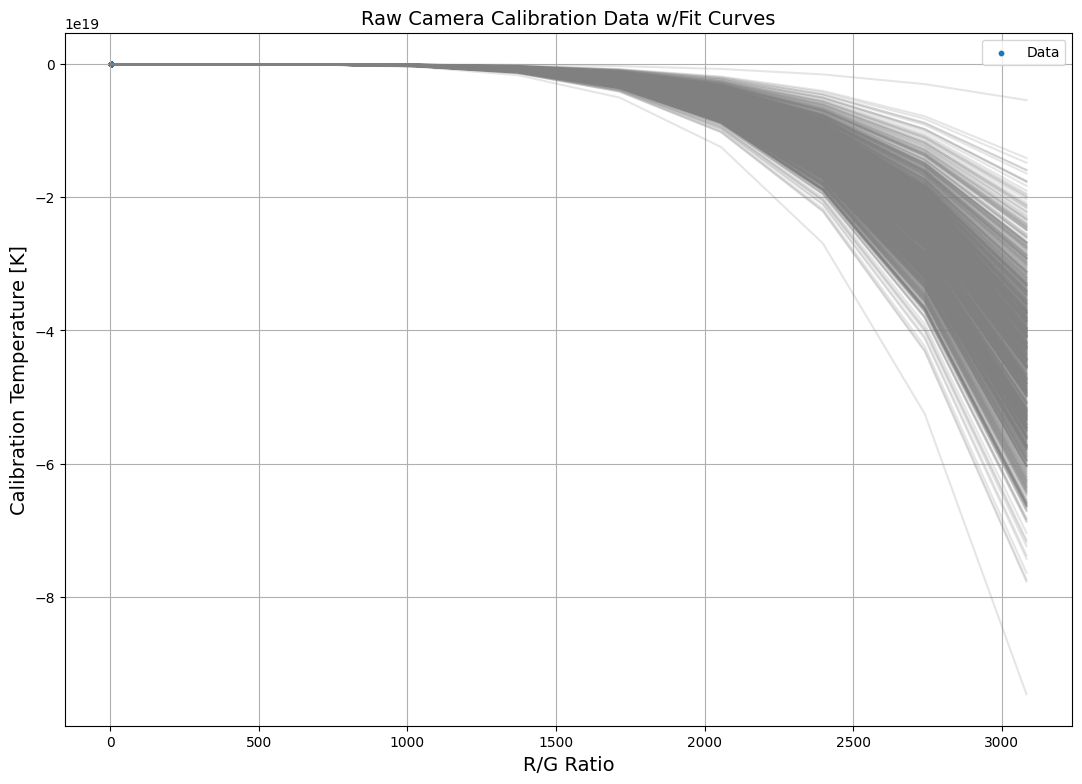

In [ ]:
#####################################################################
# PLOTTING THE BOOTSTRAP CURVES TO VISUALIZE THE UNCERTAINTY
#####################################################################

plt.figure(figsize=(13, 9))  # Adjust the dimensions as desired

plt.scatter(xb, yb, label='Data', s=10)

# # Plot the bootstrap fits
x_plot = np.linspace(np.min(xb), np.max(yb), 10)
for i in range(num_iterations):
    fit_curve = np.poly1d(boot_coefficients[i])
    y_fit = fit_curve(x_plot)
    plt.plot(x_plot, y_fit, color='gray', alpha=0.2)

plt.xlabel('R/G Ratio', fontsize=14)
plt.ylabel('Calibration Temperature [K]', fontsize=14)
plt.title('Raw Camera Calibration Data w/Fit Curves', fontsize=14)
plt.legend()
plt.grid(True)

In [ ]:
#####################################################################
# TEST SECTION TO ASSESS THE ERROR RANGES FOR INDIVIDUAL VALUES FROM THE BOOTSTRAP METHOD
#####################################################################


'''
It doesn't appear to be working. Maybe plotting will highlight where I went wrong.
'''

x_value = 1.0

# Calculate the prediction error range
error_range = calculate_prediction_error(x_value, boot_coefficients)

# Retrieve the plus/minus error values
minus_error = error_range[0]
plus_error = error_range[1]

# Print the predicted y value and the error range
predicted_y = Polynomial(coefficients.mean(axis=0))(x_value)
print(f"Predicted Y: {predicted_y}")
print(f"Error Range: [{minus_error}, {plus_error}]")


Predicted Y: 465.26496621646703
Error Range: [2786.3983287764545, 2796.7833140845246]
